In [1]:
# Calulcate gradient_ns and gradient_we based on NLDAS topography netcdf.

import os
import numpy as np
import xarray as xr
import netCDF4 as nc

root_dir = '/glade/u/home/hongli/scratch/2020_04_21nldas_gmet/data'
nldas_force_file = 'nldas_daily_utc/NLDAS_2016.nc'

nldas_topo_file = 'nldas_topo/NLDAS_topo.nc'
# generated from step01_calculate_gradient_ns_we

gridinfo_tpl = 'nldas_topo/conus_ens_grid_eighth_deg_v1p1.nc' 
# AndyN's latest CONUS topography grid file @hydro-c1 /d2/anewman/prob_qpe/version_1p1/grid/conus_ens_grid_eighth_deg_v1p1.nc

ofile = 'nldas_topo/conus_ens_grid_eighth.nc'
if os.path.exists(os.path.join(root_dir,ofile)):
    os.remove(os.path.join(root_dir,ofile))

# read NLDAS topography
f = xr.open_dataset(os.path.join(root_dir,nldas_topo_file))
lat = f['lat'].values[:] #(224)
lon = f['lon'].values[:] #(464)
NLDAS_elev = f['NLDAS_elev'].values[:][0,:,:] #(time,ny,nx)->(ny,nx)
gradient_n_s = f['gradient_n_s'].values[:][0,:,:] 
gradient_w_e = f['gradient_w_e'].values[:][0,:,:] 
mask_topo = (~np.isnan(NLDAS_elev))

# read NLDAS forcing
f = xr.open_dataset(os.path.join(root_dir,nldas_force_file))
lat_110 = f['lat_110'].values[:] #(224)
lon_110 = f['lon_110'].values[:] #(464)
tair_min = f['tair_min'].values[:] #(365,224,464)
mask_force = (~np.isnan(tair_min[0,:,:]))

# # common mask
# mask = ((mask_topo==True) & (mask_force==True))
# elev_mask = np.where(mask==True,NLDAS_elev,np.nan)
# gradient_n_s_mask = np.where(mask==True,gradient_n_s,np.nan) 
# gradient_w_e_mask = np.where(mask==True,gradient_w_e,np.nan)
# (ny,nx) = np.shape(mask)

# # process latitude and longitude
# lat_2d = lat.reshape(ny,1).repeat(nx,axis=1)
# lon_2d = lon.reshape(1,nx).repeat(ny,axis=0)
# dx = 1/8.0
# dy = 1/8.0
# startx = lat[0]
# starty = lon[0]

# # save
# with nc.Dataset(os.path.join(root_dir,gridinfo_tpl)) as src:
#     with nc.Dataset(os.path.join(root_dir,ofile), "w") as dst:
        
#         # create dimensions
#         dst.createDimension('param', 1)
#         dst.createDimension('y', ny)
#         dst.createDimension('x', nx)

#         # copy variable attributes all at once via dictionary (for the included variables)
#         for name, variable in src.variables.items():
#             x = dst.createVariable(name, variable.datatype, variable.dimensions)               
#             dst[name].setncatts(src[name].__dict__)

#         # assign values for variables ([:] is necessary)
#         dst.variables['latitude'][:] = lat_2d
#         dst.variables['longitude'][:] = lon_2d
#         dst.variables['elev'][:] = elev_mask
#         dst.variables['gradient_n_s'][:] = gradient_n_s_mask 
#         dst.variables['gradient_w_e'][:] = gradient_w_e_mask 
#         dst.variables['mask'][:] = mask
#         dst.variables['data_mask'][:] = mask
#         dst.variables['land_mask'][:] = mask
#         dst.variables['dx'][:] = dx
#         dst.variables['dy'][:] = dy
#         dst.variables['startx'][:] = startx
#         dst.variables['starty'][:] = starty     
        
print('Done')

Done


In [4]:
np.where((mask_topo==True) != (mask_force==True))

(array([  0,   1,   1,   2,   2,   4,   9,  11,  15,  18,  19,  19,  21,
         26,  27,  27,  30,  30,  31,  31,  32,  32,  32,  32,  32,  33,
         33,  34,  36,  37,  37,  38,  41,  41,  41,  41,  48,  59,  62,
        121, 129, 131, 143, 150, 150]),
 array([382, 114, 391, 374, 375, 365, 379, 377, 380, 103, 104, 105, 223,
        101,  78, 101,  52,  53,  52,  54,  52,  54,  95, 275, 353,  52,
        288, 287, 287, 285, 289, 350, 288, 289, 292, 293,  93,  61,  51,
        408, 440, 439, 435, 448, 449]))

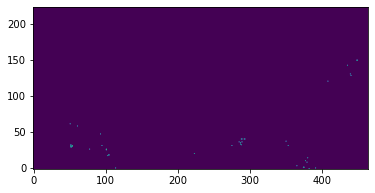

In [6]:
import matplotlib.pyplot as plt
plt.imshow((mask_topo==True) != (mask_force==True), origin='lower')
plt.show()

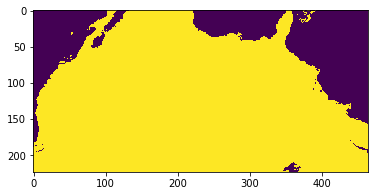

In [14]:
import matplotlib.pyplot as plt
plt.imshow(mask_topo)
plt.show()

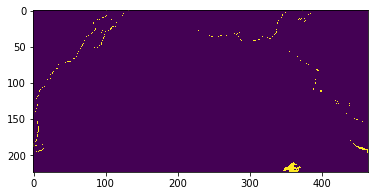

In [17]:
import matplotlib.pyplot as plt
plt.imshow((mask_force==True) & (mask_topo==False))
plt.show()

In [4]:
np.shape(np.where(mask_force==True))[1],np.shape(np.where(mask_topo==True))[1],np.shape(np.where((mask_force==True) & (mask_topo==True)))[1]

(80439, 79876, 79831)

In [10]:
startx,starty

(25.0625, -124.9375)

In [8]:
longitude

array([[-124.9375, -124.8125, -124.6875, ...,  -67.3125,  -67.1875,
         -67.0625],
       [-124.9375, -124.8125, -124.6875, ...,  -67.3125,  -67.1875,
         -67.0625],
       [-124.9375, -124.8125, -124.6875, ...,  -67.3125,  -67.1875,
         -67.0625],
       ...,
       [-124.9375, -124.8125, -124.6875, ...,  -67.3125,  -67.1875,
         -67.0625],
       [-124.9375, -124.8125, -124.6875, ...,  -67.3125,  -67.1875,
         -67.0625],
       [-124.9375, -124.8125, -124.6875, ...,  -67.3125,  -67.1875,
         -67.0625]])